In [52]:
import os
from pathlib import Path

# Change directory
# Modify this cell to insure that the output shows the correct path.
# Define all paths relative to the project root shown in the cell output
project_root = "/Users/liuqiaowei/SourceCode/freqtrade/user_data/notebooks"
i = 0
try:
    os.chdir(project_root)
    if not Path("LICENSE").is_file():
        i = 0
        while i < 4 and (not Path("LICENSE").is_file()):
            os.chdir(Path(Path.cwd(), "../"))
            i += 1
        project_root = Path.cwd()
except FileNotFoundError:
    print("Please define the project root relative to the current directory")
print(Path.cwd())

/Users/liuqiaowei/SourceCode/freqtrade


In [53]:
from freqtrade.configuration import Configuration


# Customize these according to your needs.

# Initialize empty configuration object
config = Configuration.from_files(["./user_data/config.json"])
# Optionally (recommended), use existing configuration file
# config = Configuration.from_files(["user_data/config.json"])

# Location of the data
data_location = config["datadir"]
config['timeframe'] = '1h'
# Pair to analyze - Only use one pair here
# config['exchange']['pair_whitelist']

In [54]:
from freqtrade.data.history import load_pair_history
from freqtrade.enums import CandleType

candles_dict = {}
for pair in config['exchange']['pair_whitelist']:
    candles = load_pair_history(
        datadir=data_location,
        timeframe=config["timeframe"],
        pair=pair,
        data_format="feather",  # Make sure to update this to your data
        candle_type=CandleType.FUTURES,
    )
    # candles['sym'] = pair
    # candles.set_index('date', inplace=True)
    # candles.set_index('sym', append=True, inplace=True)
    # candles['return'] = candles['close'].pct_change().shift(-2)
    
    # Keep Latest week for testing
    # candles_dict[pair] = candles.iloc[-268:]
    candles_dict[pair] = candles[-24*30:]

In [69]:
list = [1, 2, 3]
len(set(list))

3

In [56]:
import pandas as pd
import talib.abstract as ta

def factor_open(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = dataframe['open']
    return dataframe

def factor_rocr(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ROCR(dataframe, timeperiod=52)
    return dataframe

def factor_rocr100(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ROCR100(dataframe, timeperiod=7)
    return dataframe

def factor_roc(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ROC(dataframe, timeperiod=28)
    return dataframe

def factor_trix(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.TRIX(dataframe, timeperiod=17)
    return dataframe

def factor_trix1(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.TRIX(dataframe, timeperiod=13)
    return dataframe

def factor_cci(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.CCI(dataframe, timeperiod=20)
    return dataframe

def factor_rsi(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.RSI(dataframe, timeperiod=49)
    return dataframe

def factor_adx(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ADX(dataframe, timeperiod=34)
    return dataframe

def factor_dx(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.DX(dataframe, timeperiod=8)
    return dataframe

def factor_adxr(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ADXR(dataframe, timeperiod=34)
    return dataframe

def factor_ppo(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.PPO(dataframe, fastperiod=17, slowperiod=24)
    return dataframe

def factor_bop(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.BOP(dataframe)
    return dataframe

def factor_minus_di(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.MINUS_DI(dataframe, timeperiod=7)
    return dataframe

def factor_minus_dm(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.MINUS_DM(dataframe, timeperiod=20)
    return dataframe

def factor_minus_di1(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.MINUS_DI(dataframe, timeperiod=20)
    return dataframe

def factor_ultosc(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ULTOSC(dataframe, timeperiod1=57, timeperiod2=59, timeperiod=60)
    return dataframe

def factor_ultosc1(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ULTOSC(dataframe, timeperiod1=11, timeperiod2=9, timeperiod=11)
    return dataframe

def factor_mfi(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.MFI(dataframe, timeperiod=20)
    return dataframe

def factor_mfi1(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.MFI(dataframe, timeperiod=7)
    return dataframe

def factor_plus_di(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.PLUS_DI(dataframe, timeperiod=56)
    return dataframe

def factor_plus_dm(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.PLUS_DM(dataframe, timeperiod=58)
    return dataframe

def factor_willr(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.WILLR(dataframe, timeperiod=28)
    return dataframe

def factor_aroonosc(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.AROONOSC(dataframe, timeperiod=22)
    return dataframe

def factor_aroonosc1(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.AROONOSC(dataframe, timeperiod=8)
    return dataframe

def factor_aroondown(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name], _ = ta.AROON(dataframe, timeperiod=51)
    return dataframe

def factor_aroonup(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    _, dataframe[pair_name] = ta.AROON(dataframe, timeperiod=51)
    return dataframe

def factor_natr(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.NATR(dataframe, timeperiod=7)
    return dataframe

def factor_bop(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.BOP(dataframe)
    return dataframe

def factor_adosc(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ADOSC(dataframe, fastperiod=31, slowperiod=34)
    return dataframe

def factor_adosc1(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.ADOSC(dataframe, fastperiod=5, slowperiod=9)
    return dataframe

def factor_ad(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.AD(dataframe)
    return dataframe

def factor_apo(dataframe: pd.DataFrame, pair_name: str) -> pd.DataFrame:
    dataframe[pair_name] = ta.APO(dataframe, fastperiod=12, slowperiod=24)
    return dataframe


In [57]:
from user_data.notebooks.ta_factors import TAFactors
factors_df_dict = {}

open_df = pd.DataFrame()
for key, value in candles_dict.items():
    candles = value.copy()
    candles.set_index(['date'], inplace=True)
    if len(factors_df_dict.keys()) == 0:
        # Hard code parameter first for research
        factors_df_dict['NATR'] = factor_natr(candles, key)[key].to_frame()
        factors_df_dict['ROCR100'] = factor_rocr100(candles, key)[key].to_frame()
        factors_df_dict['TRIX'] = factor_trix(candles, key)[key].to_frame()
        factors_df_dict['PPO'] = factor_ppo(candles, key)[key].to_frame()
        factors_df_dict['DX'] = factor_dx(candles, key)[key].to_frame()
        factors_df_dict['MINUS_DI'] = factor_minus_di(candles, key)[key].to_frame()
        factors_df_dict['MINUS_DI1'] = factor_minus_di1(candles, key)[key].to_frame()
        factors_df_dict['BOP'] = factor_bop(candles, key)[key].to_frame()
        factors_df_dict['PLUS_DI'] = factor_plus_di(candles, key)[key].to_frame()
        factors_df_dict['AROONOSC'] = factor_aroonosc(candles, key)[key].to_frame()
        factors_df_dict['AROONOSC1'] = factor_aroonosc1(candles, key)[key].to_frame()
        factors_df_dict['ULTOSC'] = factor_ultosc(candles, key)[key].to_frame()
        factors_df_dict['ULTOSC1'] = factor_ultosc1(candles, key)[key].to_frame()
        factors_df_dict['MFI'] = factor_mfi(candles, key)[key].to_frame()
        factors_df_dict['MFI1'] = factor_mfi1(candles, key)[key].to_frame()
        factors_df_dict['MINUS_DM'] = factor_minus_dm(candles, key)[key].to_frame()
        factors_df_dict['ADOSC'] = factor_adosc(candles, key)[key].to_frame()
        factors_df_dict['AD'] = factor_ad(candles, key)[key].to_frame()
        open_df = factor_open(candles, key)[key].to_frame()
    else:
        factors_df_dict['NATR'] = factors_df_dict['NATR'].join(factor_natr(candles, key)[key].to_frame())
        factors_df_dict['ROCR100'] = factors_df_dict['ROCR100'].join(factor_rocr100(candles, key)[key].to_frame())
        factors_df_dict['TRIX'] = factors_df_dict['TRIX'].join(factor_trix(candles, key)[key].to_frame())
        factors_df_dict['PPO'] = factors_df_dict['PPO'].join(factor_ppo(candles, key)[key].to_frame())
        factors_df_dict['DX'] = factors_df_dict['DX'].join(factor_dx(candles, key)[key].to_frame())
        factors_df_dict['MINUS_DI'] = factors_df_dict['MINUS_DI'].join(factor_minus_di(candles, key)[key].to_frame())
        factors_df_dict['MINUS_DI1'] = factors_df_dict['MINUS_DI1'].join(factor_minus_di1(candles, key)[key].to_frame())
        factors_df_dict['BOP'] = factors_df_dict['BOP'].join(factor_bop(candles, key)[key].to_frame())
        factors_df_dict['PLUS_DI'] = factors_df_dict['PLUS_DI'].join(factor_plus_di(candles, key)[key].to_frame())
        factors_df_dict['AROONOSC'] = factors_df_dict['AROONOSC'].join(factor_aroonosc(candles, key)[key].to_frame())
        factors_df_dict['AROONOSC1'] = factors_df_dict['AROONOSC1'].join(factor_aroonosc1(candles, key)[key].to_frame())
        factors_df_dict['ULTOSC'] = factors_df_dict['ULTOSC'].join(factor_ultosc(candles, key)[key].to_frame())
        factors_df_dict['ULTOSC1'] = factors_df_dict['ULTOSC1'].join(factor_ultosc1(candles, key)[key].to_frame())
        factors_df_dict['MFI'] = factors_df_dict['MFI'].join(factor_mfi(candles, key)[key].to_frame())
        factors_df_dict['MFI1'] = factors_df_dict['MFI1'].join(factor_mfi1(candles, key)[key].to_frame())
        factors_df_dict['MINUS_DM'] = factors_df_dict['MINUS_DM'].join(factor_minus_dm(candles, key)[key].to_frame())
        factors_df_dict['ADOSC'] = factors_df_dict['ADOSC'].join(factor_adosc(candles, key)[key].to_frame())
        factors_df_dict['AD'] = factors_df_dict['AD'].join(factor_ad(candles, key)[key].to_frame())
        open_df = open_df.join(factor_open(candles, key)[key].to_frame())



In [58]:
from user_data.notebooks.factor_analysis_helper import standardize

# Standardize Factor

standardized_factors_df_dict = {}
for key in factors_df_dict.keys():
    print(key)
    standardized_factors_df_dict[key] = standardize(factors_df_dict[key])

standardized_factors_df_dict.keys()

NATR
ROCR100
TRIX
PPO
DX
MINUS_DI
MINUS_DI1
BOP
PLUS_DI
AROONOSC
AROONOSC1
ULTOSC
ULTOSC1
MFI
MFI1
MINUS_DM
ADOSC
AD


dict_keys(['NATR', 'ROCR100', 'TRIX', 'PPO', 'DX', 'MINUS_DI', 'MINUS_DI1', 'BOP', 'PLUS_DI', 'AROONOSC', 'AROONOSC1', 'ULTOSC', 'ULTOSC1', 'MFI', 'MFI1', 'MINUS_DM', 'ADOSC', 'AD'])

In [59]:
from user_data.notebooks.factor_analysis_helper import Quick_Factor_Return_N_IC

# IC IR Checking
factor_icir_result = {}
factors_icir_report_dict = {}
icir_factors_list = []

for key in standardized_factors_df_dict.keys():
    factor_icir_result[key], factors_icir_report_dict[key] = Quick_Factor_Return_N_IC(standardized_factors_df_dict[key], open_df, 1, key, '1h')
    if abs(factors_icir_report_dict[key]['IC mean']) > 0.03 or abs(factors_icir_report_dict[key]['IR']) > 0.3:
        icir_factors_list.append(key)

icir_factors_list

['NATR', 'ROCR100', 'MINUS_DI', 'MINUS_DI1', 'BOP', 'PLUS_DI']

In [60]:
temp = {}
for key, value in factors_icir_report_dict.items():
    temp[key] = value['IC mean']
    
temp

{'NATR': -0.0339,
 'ROCR100': -0.041,
 'TRIX': -0.0165,
 'PPO': -0.0132,
 'DX': -0.0035,
 'MINUS_DI': 0.0373,
 'MINUS_DI1': 0.0341,
 'BOP': -0.0449,
 'PLUS_DI': -0.0315,
 'AROONOSC': -0.0101,
 'AROONOSC1': -0.0114,
 'ULTOSC': -0.0075,
 'ULTOSC1': -0.0114,
 'MFI': -0.0259,
 'MFI1': -0.0184,
 'MINUS_DM': -0.0078,
 'ADOSC': 0.0001,
 'AD': 0.0016}

In [61]:
from user_data.notebooks.factor_analysis_helper import Factor_Group_Analysis

# Group Analysis
group_weekly_ret_dict = {}
group_corr_dict = {}
group_factors_list = []

for key in standardized_factors_df_dict.keys():
    group_weekly_ret_dict[key], group_corr_dict[key] = Factor_Group_Analysis(standardized_factors_df_dict[key].dropna(), open_df, 5, 1, key)
    if abs(group_corr_dict[key]) > 0.6:
        group_factors_list.append(key)
    
group_factors_list

 当前：676 / 总量：713

KeyboardInterrupt: 

In [62]:
# Try Combine
combine_factor_df = pd.DataFrame()

for key in standardized_factors_df_dict.keys():
    ic = factors_icir_report_dict[key]['IC mean']
    if combine_factor_df.shape[0] == 0:
        combine_factor_df = standardized_factors_df_dict[key] * (-1 if ic < 0 else 1)
    else:
        combine_factor_df = combine_factor_df + (standardized_factors_df_dict[key] * (-1 if ic < 0 else 1))

combine_factor_df.iloc[-1].dropna().sort_values().index

Index(['KSM/USDT:USDT', 'SAND/USDT:USDT', 'XLM/USDT:USDT', 'MANA/USDT:USDT',
       'AXS/USDT:USDT', 'ENJ/USDT:USDT', 'ATOM/USDT:USDT', 'FLOW/USDT:USDT',
       'COMP/USDT:USDT', 'ANKR/USDT:USDT', 'DASH/USDT:USDT', 'FIL/USDT:USDT',
       'APE/USDT:USDT', 'BLUR/USDT:USDT', 'ZEC/USDT:USDT', 'LPT/USDT:USDT',
       'XTZ/USDT:USDT', 'YFI/USDT:USDT', 'DOT/USDT:USDT', 'GALA/USDT:USDT',
       'GMT/USDT:USDT', 'ALGO/USDT:USDT', 'CHZ/USDT:USDT', 'IMX/USDT:USDT',
       'CFX/USDT:USDT', 'SNX/USDT:USDT', 'EGLD/USDT:USDT', 'T/USDT:USDT',
       'SEI/USDT:USDT', 'DYDX/USDT:USDT', '1INCH/USDT:USDT', 'XEM/USDT:USDT',
       'BAT/USDT:USDT', 'FXS/USDT:USDT', 'LRC/USDT:USDT', 'KAVA/USDT:USDT',
       'ICX/USDT:USDT', 'EOS/USDT:USDT', 'MINA/USDT:USDT', 'ZIL/USDT:USDT',
       'ASTR/USDT:USDT', 'ZRX/USDT:USDT', 'MASK/USDT:USDT', 'WOO/USDT:USDT',
       'CELO/USDT:USDT', 'HOT/USDT:USDT', 'NEO/USDT:USDT', 'LINK/USDT:USDT',
       'ONT/USDT:USDT', 'SXP/USDT:USDT', 'ICP/USDT:USDT', 'ROSE/USDT:USDT',
      

In [63]:
ic_result, report = Quick_Factor_Return_N_IC(combine_factor_df, open_df, 1, 'combo', '1h')

report

{'name': 'combo',
 'time frame': '1h',
 'IC mean': 0.0402,
 'IC std': 0.1694,
 'IR': 0.237,
 'IC>0': 0.5903,
 'ABS_IC>2%': 0.8983}

<Axes: title={'center': 'CUM_IC'}, xlabel='date'>

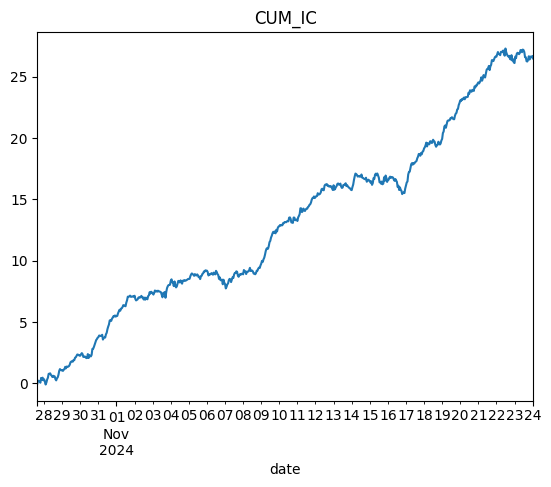

In [64]:
ic_result.cumsum().plot(title = 'CUM_IC')

<Axes: title={'center': 'IC_DAILY'}, xlabel='date'>

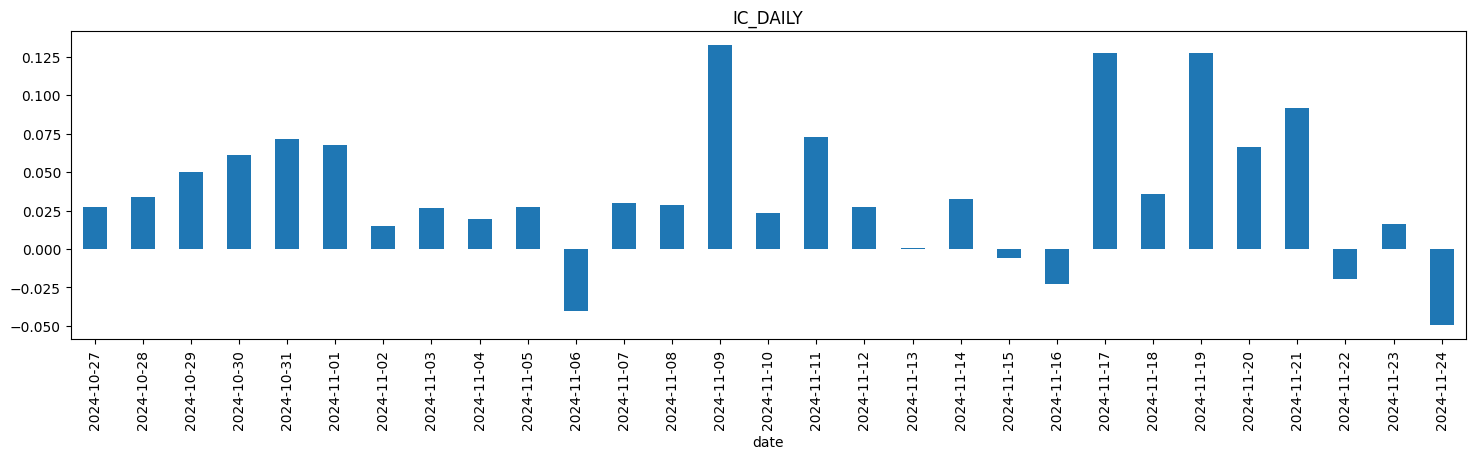

In [65]:
ic_day = ic_result.resample('D').mean()
ic_day.index = ic_day.index.strftime("%F")
ic_day.plot(kind = 'bar',figsize=(18,4),title = 'IC_DAILY')

In [ ]:
Factor_Group_Analysis(combine_factor_df, open_df, 5, 1, '')

In [ ]:
# Latest week combine factors check
combine_factor_latest_week_df = combine_factor_df.iloc[-168:]

In [ ]:
Quick_Factor_Return_N_IC(combine_factor_latest_week_df, open_df, 4, 'combo', '1h')

In [ ]:
Factor_Group_Analysis(combine_factor_latest_week_df, open_df, 10, 4, '')